In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
def buggy_PCA(X, d):
    U, S, Vt = np.linalg.svd(X, full_matrices=False)
    Z = U[:, :d] * S[:d]
    A = Vt[:d, :].T
    reconstruction = Z @ A.T
    return Z, A, reconstruction

In [3]:
def demeaned_PCA(X, d):
    X_centered = X - np.mean(X, axis=0)
    U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)
    Z = U[:, :d] * S[:d]
    A = Vt[:d, :].T
    reconstruction = Z @ A.T + np.mean(X, axis=0)
    return Z, A, reconstruction

In [4]:
def normalized_PCA(X, d):
    scaler = StandardScaler()
    X_normalized = scaler.fit_transform(X)
    U, S, Vt = np.linalg.svd(X_normalized, full_matrices=False)
    Z = U[:, :d] * S[:d]
    A = Vt[:d, :].T
    reconstruction = (Z @ A.T) * scaler.scale_ + scaler.mean_
    return Z, A, reconstruction

In [5]:
def DRO(X, d):
    X_centered = X - np.mean(X, axis=0)
    U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)
    Z = U[:, :d] * S[:d]
    A = Vt[:d, :].T
    b = np.mean(X, axis=0)
    reconstruction = Z @ A.T + b
    return Z, A, b, reconstruction

In [6]:
def reconstruction_error(X, reconstruction):
    return np.sum(np.linalg.norm(X - reconstruction, axis=1)**2)

In [7]:
data2D = pd.read_csv('data/data2D.csv', header=None).values
data1000D = pd.read_csv('data/data1000D.csv', header=None).values

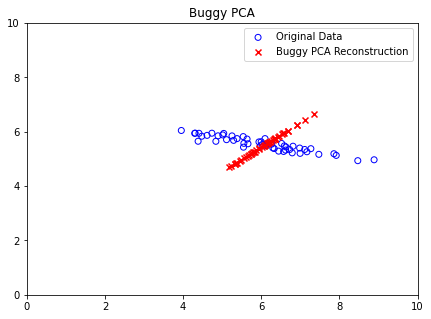

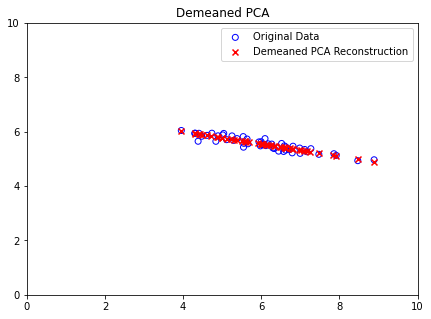

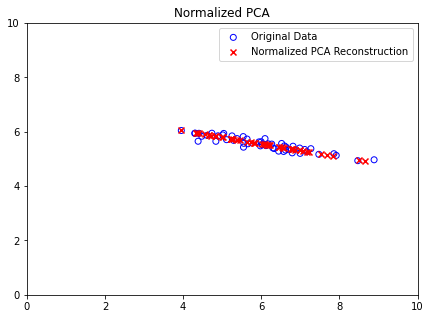

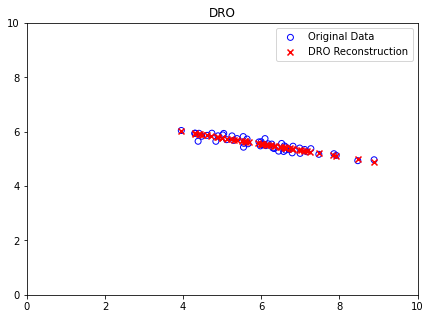

error_buggy: 44.345154186739705
error_demeaned: 0.5003042814256455
error_normalized: 2.4736041727385354
error_DRO: 0.5003042814256455


In [8]:
d_2d = 1
Z_buggy, A_buggy, recon_buggy = buggy_PCA(data2D, d_2d)
Z_demeaned, A_demeaned, recon_demeaned = demeaned_PCA(data2D, d_2d)
Z_normalized, A_normalized, recon_normalized = normalized_PCA(data2D, d_2d)
Z_DRO, A_DRO, b_DRO, recon_DRO = DRO(data2D, d_2d)

error_buggy = reconstruction_error(data2D, recon_buggy)
error_demeaned = reconstruction_error(data2D, recon_demeaned)
error_normalized = reconstruction_error(data2D, recon_normalized)
error_DRO = reconstruction_error(data2D, recon_DRO)

fig1 = plt.figure(figsize=(7,5))
plt.scatter(data2D[:, 0], data2D[:, 1], facecolors='none', edgecolors='b', label='Original Data')
plt.scatter(recon_buggy[:, 0], recon_buggy[:, 1], marker='x', color='r', label='Buggy PCA Reconstruction')
plt.legend()
plt.title('Buggy PCA')
plt.xlim([0,10])
plt.ylim([0,10])
plt.show()

fig2 = plt.figure(figsize=(7,5))
plt.scatter(data2D[:, 0], data2D[:, 1], facecolors='none', edgecolors='b', label='Original Data')
plt.scatter(recon_demeaned[:, 0], recon_demeaned[:, 1], marker='x', color='r', label='Demeaned PCA Reconstruction')
plt.legend()
plt.title('Demeaned PCA')
plt.xlim([0,10])
plt.ylim([0,10])
plt.show()

fig3 = plt.figure(figsize=(7,5))
plt.scatter(data2D[:, 0], data2D[:, 1], facecolors='none', edgecolors='b', label='Original Data')
plt.scatter(recon_normalized[:, 0], recon_normalized[:, 1], marker='x', color='r', label='Normalized PCA Reconstruction')
plt.legend()
plt.title('Normalized PCA')
plt.xlim([0,10])
plt.ylim([0,10])
plt.show()

fig4 = plt.figure(figsize=(7,5))
plt.scatter(data2D[:, 0], data2D[:, 1], facecolors='none', edgecolors='b', label='Original Data')
plt.scatter(recon_DRO[:, 0], recon_DRO[:, 1], marker='x', color='r', label='DRO Reconstruction')
plt.legend()
plt.title('DRO')
plt.xlim([0,10])
plt.ylim([0,10])
plt.show()

fig1.savefig('q2-3_buggy_pca.png', dpi=300)
fig2.savefig('q2-3_demeaned_pca.png', dpi=300)
fig3.savefig('q2-3_normalized_pca.png', dpi=300)
fig4.savefig('q2-3_dro.png', dpi=300)
print('error_buggy:', error_buggy)
print('error_demeaned:', error_demeaned)
print('error_normalized:', error_normalized)
print('error_DRO:', error_DRO)

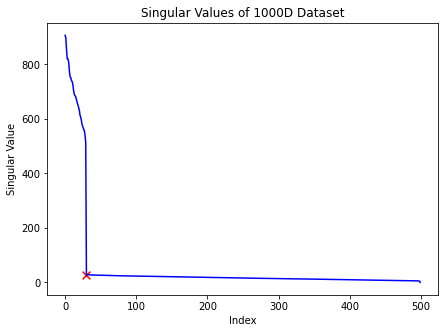

d = 30


In [9]:
U, S, Vt = np.linalg.svd(data1000D - np.mean(data1000D, axis=0), full_matrices=False)
derivative = np.diff(S, n=2)
knee_point = np.argmax(derivative) + 1


fig5 = plt.figure(figsize=(7,5))
plt.plot(S, color='b')
plt.scatter([knee_point], [S[knee_point]], marker='x', s=60, color='r')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.title('Singular Values of 1000D Dataset')
plt.show()

print('d =', knee_point)
fig5.savefig('q2-3_1000d',dpi=300)


In [10]:
d_1000d = knee_point
Z_buggy_1000d, A_buggy_1000d, recon_buggy_1000d = buggy_PCA(data1000D, d_1000d)
Z_demeaned_1000d, A_demeaned_1000d, recon_demeaned_1000d = demeaned_PCA(data1000D, d_1000d)
Z_normalized_1000d, A_normalized_1000d, recon_normalized_1000d = normalized_PCA(data1000D, d_1000d)
Z_DRO_1000d, A_DRO_1000d, b_DRO_1000d, recon_DRO_1000d = DRO(data1000D, d_1000d)

error_buggy_1000d = reconstruction_error(data1000D, recon_buggy_1000d)
error_demeaned_1000d = reconstruction_error(data1000D, recon_demeaned_1000d)
error_normalized_1000d = reconstruction_error(data1000D, recon_normalized_1000d)
error_DRO_1000d = reconstruction_error(data1000D, recon_DRO_1000d)


print('error_buggy:', error_buggy_1000d)
print('error_demeaned:', error_demeaned_1000d)
print('error_normalized:', error_normalized_1000d)
print('error_DRO:', error_DRO_1000d)

error_buggy: 401365.6993101792
error_demeaned: 136522.97948930142
error_normalized: 136814.29049881164
error_DRO: 136522.97948930142
